In [9]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import exp_config
from data_helper import *
from image_analysis import *
import accumulators


In [34]:
runNR=1312813

In [36]:
#accumulators
spectrum_mean=accumulators.Mean()
forward_mean=accumulators.Mean()
forward_hist_mean=accumulators.Mean()
side_mean=accumulators.Mean()
side_max=accumulators.Maximum()

side_hist_mean=accumulators.Mean()
side_bright_pershot = []


#calculators
side_hist = Histogrammer(bins=100, range=(0,500)) # TODO: set bin edges
forward_hist = Histogrammer(bins=100, range=(0,500)) # TODO: set bin edges
side_bright_counter = RangeCounter(low=0) #set low edge threshold for bright pixel

for i,shot in tqdm(enumerate(Run(exp_config.detector_keys,exp_config.database_keys, run=runNR))):
    # do something with the data.
    
    #spectrometer
    spectrum = np.mean(shot.spectrometer, axis=1)
    spectrum_mean.accumulate(spectrum)
    
    #image detectors
    side_mean.accumulate(shot.side_ccd)
    forward_mean.accumulate(shot.forward_ccd)
    side_max.accumulate(shot.side_ccd)
    
    side_bright_pershot.append(side_bright_counter(shot.side_ccd))
    
    #image hists
    side_hist_mean.accumulate(side_hist(shot.side_ccd))
    forward_hist_mean.accumulate(forward_hist(shot.forward_ccd))
    
    if i>100:
        break
    
                  
        
        
    

1000it [01:45,  9.52it/s]


In [33]:
r=Run(exp_config.detector_keys,exp_config.database_keys, run=runNR)

In [ ]:
r=

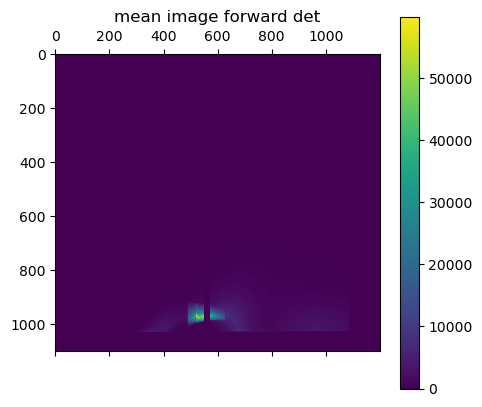

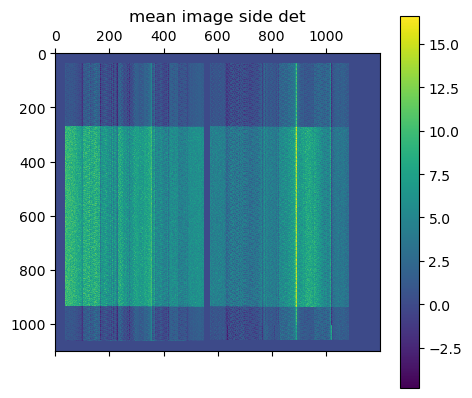

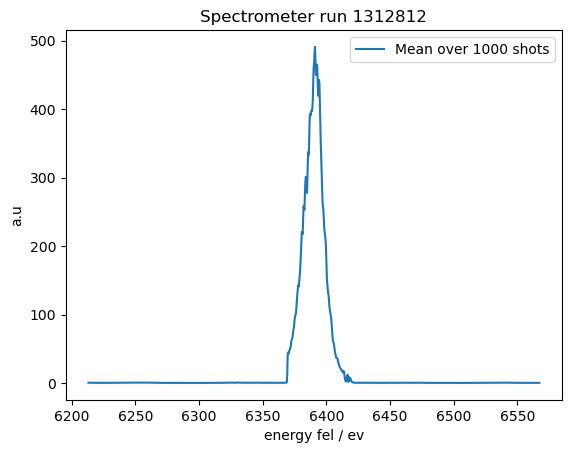

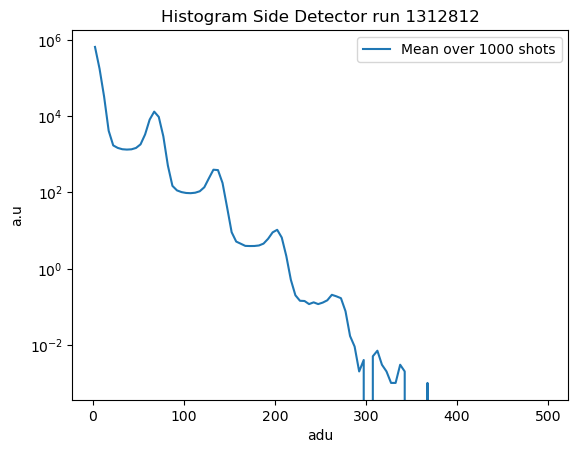

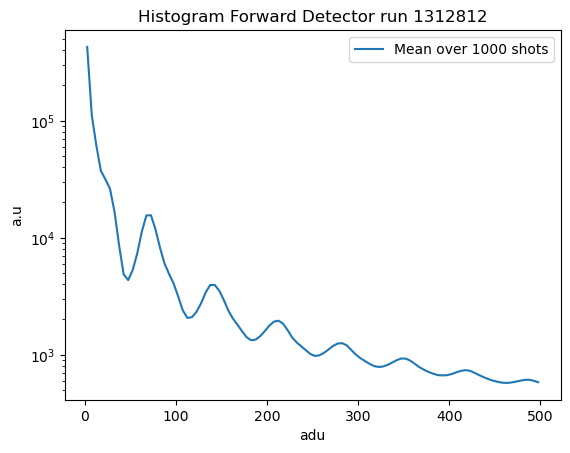

In [32]:
#mean images
plt.matshow(forward_mean)
plt.title("mean image forward det")
plt.colorbar()
plt.show()

plt.matshow(side_mean)
plt.title("mean image side det")
plt.colorbar()
plt.show()


#Spectrometer Plot
plt.plot(exp_config.spectrometer_axis_iron, spectrum_mean.value,label=f"Mean over {spectrum_mean.n} shots")
plt.xlabel("energy fel / ev")
plt.ylabel("a.u")
plt.title(f"Spectrometer run {runNR}")
plt.legend()
plt.show()



#Fluorescence Spectrum
plt.plot(side_hist.centers(), side_hist_mean.value,label=f"Mean over {side_hist_mean.n} shots")
plt.xlabel("adu")
plt.ylabel("a.u")
plt.title(f"Histogram Side Detector run {runNR}")
plt.yscale("log")
plt.legend()
plt.show()



#scatter Spectrum
plt.plot(forward_hist.centers(), forward_hist_mean.value,label=f"Mean over {forward_hist_mean.n} shots")
plt.xlabel("adu")
plt.ylabel("a.u")
plt.title(f"Histogram Forward Detector run {runNR}")
plt.yscale("log")
plt.legend()
plt.show()


In [22]:
67.5/6370

0.010596546310832025

In [24]:
from pathlib import Path

def create_darks(run, path):
    path=Path(path)
    #accumulators
    forward_mean=accumulators.Mean()
    side_mean=accumulators.Mean()
   
    for shot in tqdm(Run(exp_config.detector_keys,exp_config.database_keys, run=run)):
        # do something with the data.


        #image detectors
        side_mean.accumulate(shot.side_ccd)
        forward_mean.accumulate(shot.forward_ccd)

    np.save(path/f"side_{run}.npy",side_mean.value)
    np.save(path/f"forward_{run}.npy",forward_mean.value)



create_darks(run=1312800, path="../data/darks/")

800it [00:57, 13.98it/s]
